In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  
import seaborn as sns

<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

(array([ 5.,  7., 13., 13., 21., 16., 11.,  8.,  3.,  3.]),
 array([-99.92486747, -73.18817253, -46.45147758, -19.71478263,
          7.02191231,  33.75860726,  60.4953022 ,  87.23199715,
        113.9686921 , 140.70538704, 167.44208199]),
 <BarContainer object of 10 artists>)

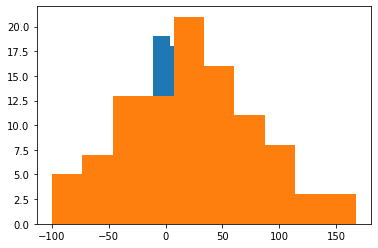

In [9]:
#проверим, нормальное ли распределение
plt.hist(A)
plt.hist(B)

Распределение близко к нормальному, выборки независимы, можно использовать t-тест

In [10]:
stats.ttest_ind(A, B)

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)

p-value больше уровня значимости 0,05 - нулевую гипотезу не отклоняем, распределения выборок могут быть равны (разница средних значений равна нулю)

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [7]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [11]:
from scipy.stats import wilcoxon

In [12]:
#выборки зависимы, применяем критерий Уилкоксона
stat, p = wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1930.000, p=0.041
Разные распределения (отвергаем H0)


(array([ 5.,  7., 13., 13., 21., 16., 11.,  8.,  3.,  3.]),
 array([-99.92486747, -73.18817253, -46.45147758, -19.71478263,
          7.02191231,  33.75860726,  60.4953022 ,  87.23199715,
        113.9686921 , 140.70538704, 167.44208199]),
 <BarContainer object of 10 artists>)

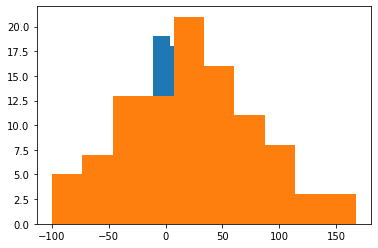

In [13]:
plt.hist(A)
plt.hist(B)

р-value меньше уровня значимости - распределения не равны. График это подтверждает

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [15]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [17]:
#выборок больше 2. для сравнения нужен дисперсионный анализ
from scipy.stats import f_oneway

F, p = f_oneway(water, water, mineral) 

alpha = 0.05  
print(F, p)  

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

12.525963044834192 2.9240047906326866e-05
Разное распределение (отклоняем H0)


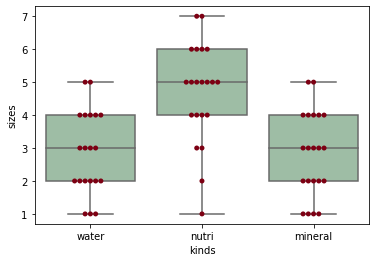

In [25]:
sizes = water + nutri + mineral
kinds = ['water']*len(water) + ['nutri']*len(nutri)+['mineral']*len(mineral)

df_mid = pd.DataFrame()
df_mid['sizes'] = sizes
df_mid['kinds'] = kinds


ax = sns.boxplot(x='kinds', y='sizes', data=df_mid, color='#99c2a2')
ax = sns.swarmplot(x="kinds", y="sizes", data=df_mid, color='#7d0013')
plt.show()

Удобрения и минералка имеют разные распределения. Эффект от удобрений лучше

# Cookie Cats (Обязательно)

<div class="alert alert-info">
 
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

In [27]:
#Данные
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [29]:
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [30]:
data.groupby('sum_gamerounds')['userid'].count()

sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

видим, что выборки поделены примерно поровну по 45 тыс, так же видим, что есть почти 4 тыс пользователей, которые установили игру, но не играли в нее (вероятно, их стоит исключить) 

In [31]:
data.groupby('version').retention_1.mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

In [32]:
data.groupby('version').retention_7.mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

мы видим, что при передвижении ворот на 40 уровень идет небольшое ухуднение на первый день возврата в игру (на 0,006), и значительное ухудшение на 7 день возврата в игру (на 0,01)
если игра популярна, то даже разница в тысячные доли может дать существенный отток пользователей (в абсолютных значениях)

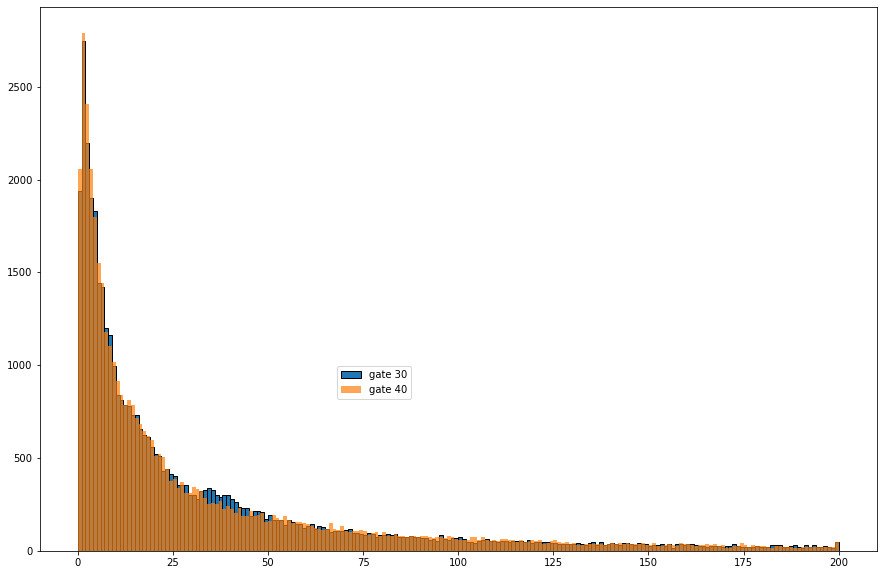

In [34]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

на графике видно, что с каждым днем количество пользователей убывает, однако, в группе, где ворота стоят на 30 уровне, количество пользователей убывает чуть медленнее

In [38]:
# Распределение не нормальное, данные независимы, для оценки будем использовать критерий Манна-Уитни
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1009027049.500, p=0.025


In [39]:
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Разные распределения (отвергаем H0)


<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

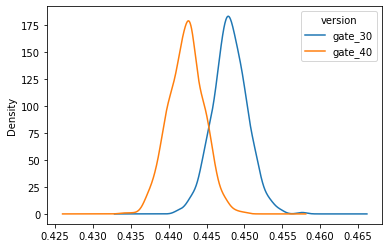

In [46]:
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_1'].mean()  
    boot_1d.append(boot_mean)
    
boot_1d = pd.DataFrame(boot_1d)
    
boot_1d.plot(kind='density')

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

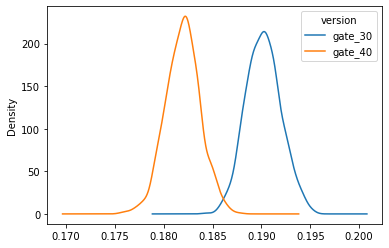

In [47]:
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  
    boot_1d.append(boot_mean)
    
boot_1d = pd.DataFrame(boot_1d)
    
boot_1d.plot(kind='density')

графики подтверждают, что распределения разные и пики удалены друг от друга довольно сильно, особенно на 7 день

**Вывод:** значимая разница между распределениями есть, при этом передвижение ворот на 40 уровень дает эффект ухудшения. 
С точки зрения продукта это можно интерпретировать так: пользователи на 30м уровне недостаточно наигрались и им хотелось продолжить, а к 40му уровню люди успевают наиграться и возвращаются уже неохотно

**Вопрос:** Стоит ли исключить тех, кто не играл вовсе, и тех, кто остановился до 30 и 40 уровня, соответственно, и не видел ворот? Или данные прошедшего теста станут некорректными? Такое надо было исключать на шаге распределения людей по группам?

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [48]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [73]:
#готовим выборки
grass = pokemon.loc[(pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock')]
grass

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False
...,...,...,...,...,...,...,...,...,...,...,...
718,719,Chespin,Grass,NaN,56,61,65,48,45,38,False
719,720,Quilladin,Grass,NaN,61,78,95,56,58,57,False
720,721,Chesnaught,Grass,Fighting,88,107,122,74,75,64,False
740,741,Skiddo,Grass,NaN,66,65,48,62,57,52,False


In [74]:
rock = pokemon.loc[(pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass')]
rock

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False
149,150,Omanyte,Rock,Water,35,40,100,90,55,35,False
150,151,Omastar,Rock,Water,70,60,125,115,70,55,False
151,152,Kabuto,Rock,Water,30,80,90,55,45,55,False
152,153,Kabutops,Rock,Water,60,115,105,65,70,80,False
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False


In [75]:
#используем ДА для оценки атаки

F, p = f_oneway(grass['Attack'], rock['Attack'])  

alpha = 0.05  
print(F, p)  

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

13.591977467682046 0.00035448490090138443
Разное распределение (отклоняем H0)


(array([7., 5., 2., 5., 6., 4., 5., 4., 1., 3.]),
 array([ 40. ,  52.5,  65. ,  77.5,  90. , 102.5, 115. , 127.5, 140. ,
        152.5, 165. ]),
 <BarContainer object of 10 artists>)

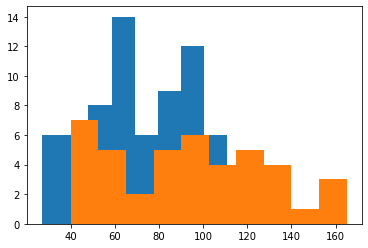

In [91]:
#визуализируем

plt.hist(grass['Attack'])
plt.hist(rock['Attack'])

Оук прав: мы получили разное распределение атак покемонов с разными классами, разница статистически значима, и класс grass при этом действительно имеет более сильную атаку. 

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [92]:
#готовим выборки
water = pokemon.loc[(pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal')]
water

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False
59,60,Psyduck,Water,NaN,50,52,48,65,50,55,False
...,...,...,...,...,...,...,...,...,...,...,...
724,725,Froakie,Water,NaN,41,56,40,62,44,71,False
725,726,Frogadier,Water,NaN,54,63,52,83,56,97,False
726,727,Greninja,Water,Dark,72,95,67,103,71,122,False
762,763,Clauncher,Water,NaN,50,53,62,58,63,44,False


In [93]:
normal = pokemon.loc[(pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water')]
normal

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
20,21,Pidgey,Normal,Flying,40,45,40,35,35,56,False
21,22,Pidgeotto,Normal,Flying,63,60,55,50,50,71,False
22,23,Pidgeot,Normal,Flying,83,80,75,70,70,101,False
23,24,Mega Pidgeot,Normal,Flying,83,80,80,135,80,121,False
24,25,Rattata,Normal,NaN,30,56,35,25,35,72,False
...,...,...,...,...,...,...,...,...,...,...,...
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,False
727,728,Bunnelby,Normal,NaN,38,36,38,32,36,57,False
728,729,Diggersby,Normal,Ground,85,56,77,50,77,78,False
729,730,Fletchling,Normal,Flying,45,50,43,40,38,62,False


In [96]:
#используем t-test для средней оценки скорости
stats.ttest_ind(water['Speed'], normal['Speed'])

Ttest_indResult(statistic=-1.5667760660025594, pvalue=0.11869444763401567)

pvalue получился больше уровня значимости 0,05, значит средние значения одинаковые и мы не отвергаем нулевую гипотезу

(array([ 2.,  8.,  6., 17., 11., 15., 16., 12.,  7.,  3.]),
 array([  5.,  18.,  31.,  44.,  57.,  70.,  83.,  96., 109., 122., 135.]),
 <BarContainer object of 10 artists>)

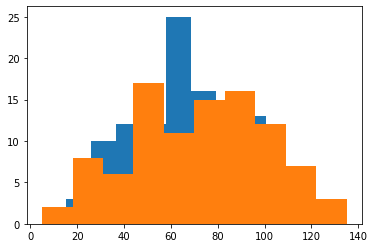

In [98]:
#визуализируем

plt.hist(water['Speed'])
plt.hist(normal['Speed'])

Оук не прав: распределения выборок могут быть равны (разница средних значений равна нулю)